In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
import scipy.cluster.hierarchy as shc

In [3]:
df = pd.read_csv("Cities_r2.csv")

In [4]:
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,Abohar,3,PUNJAB,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,"30.1452928,74.1993043",16287,8612,7675
1,Achalpur,27,MAHARASHTRA,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,"21.257584,77.5086754",8863,5269,3594
2,Adilabad,28,ANDHRA PRADESH,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,"19.0809075,79.560344",10565,6797,3768
3,Adityapur,20,JHARKHAND,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,"22.7834741,86.1576889",19225,12189,7036
4,Adoni,28,ANDHRA PRADESH,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,"15.6322227,77.2728368",11902,7871,4031


In [5]:
#Checking for missing values
df.isnull().sum()

name_of_city                      0
state_code                        0
state_name                        0
dist_code                         0
population_total                  0
population_male                   0
population_female                 0
0-6_population_total              0
0-6_population_male               0
0-6_population_female             0
literates_total                   0
literates_male                    0
literates_female                  0
sex_ratio                         0
child_sex_ratio                   0
effective_literacy_rate_total     0
effective_literacy_rate_male      0
effective_literacy_rate_female    0
location                          0
total_graduates                   0
male_graduates                    0
female_graduates                  0
dtype: int64

In [7]:
#Encoding values
le = LabelEncoder()
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = le.fit_transform(df[col])
df.head()

,name_of_city,state_code,state_name,dist_code,population_total,population_male,population_female,0-6_population_total,0-6_population_male,0-6_population_female,...,literates_female,sex_ratio,child_sex_ratio,effective_literacy_rate_total,effective_literacy_rate_male,effective_literacy_rate_female,location,total_graduates,male_graduates,female_graduates
0,0,3,22,9,145238,76840,68398,15870,8587,7283,...,44972,890,848,79.86,85.49,73.59,455,16287,8612,7675
1,1,27,14,7,112293,58256,54037,11810,6186,5624,...,43086,928,909,91.99,94.77,89.00,154,8863,5269,3594
2,2,28,1,1,117388,59232,58156,13103,6731,6372,...,37660,982,947,80.51,88.18,72.73,116,10565,6797,3768
3,3,20,10,24,173988,91495,82493,23042,12063,10979,...,54515,902,910,83.46,89.98,76.23,215,19225,12189,7036
4,4,28,1,21,166537,82743,83794,18406,9355,9051,...,45089,1013,968,68.38,76.58,60.33,66,11902,7871,4031


In [8]:
#Splitting the dataset
X = df[['effective_literacy_rate_total']]

In [10]:
#Feature scaling
s = StandardScaler()
X_scaled = s.fit_transform(X)

In [12]:
#Perform Hierarchical Clustering
linked = linkage(X_scaled,method='ward')

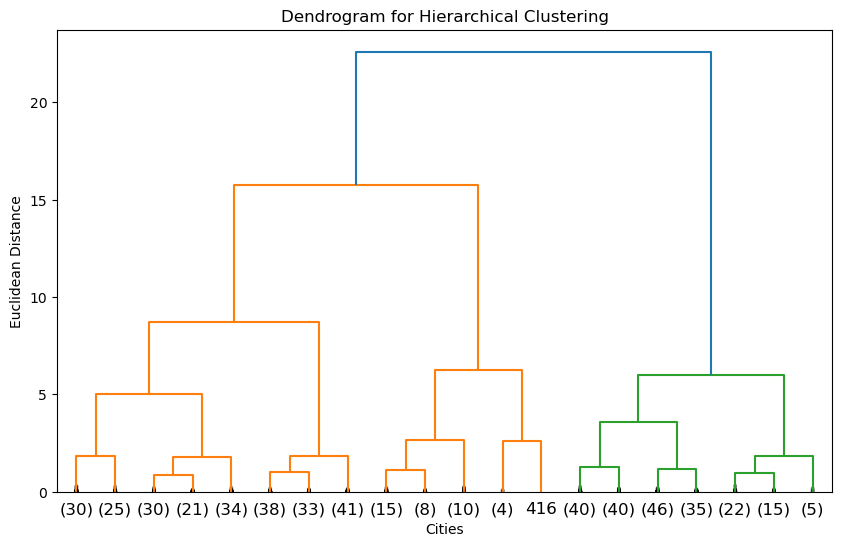

<Figure size 640x480 with 0 Axes>

In [29]:
#Dendrogram
plt.figure(figsize=(10,6))
dendrogram(linked,orientation='top',distance_sort='descending',truncate_mode='lastp',  # Show only the last p merged clusters
    p=20,                   # We'll show the last 20 merges
    show_contracted=True)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Cities")
plt.ylabel("Euclidean Distance")
plt.show()
plt.savefig('dendrogram_1.png')

In [17]:
print("Generating linkage matrix using 'ward' method...")

# The linkage matrix 'Z' contains the hierarchical clustering information
# 'method='ward'' minimizes the variance of the clusters being merged
Z = shc.linkage(X, method='ward')

print("Linkage matrix generated successfully.")

Generating linkage matrix using 'ward' method...
Linkage matrix generated successfully.


Plotting dendrogram...
Dendrogram plot saved to 'hierarchical_dendrogram.png'


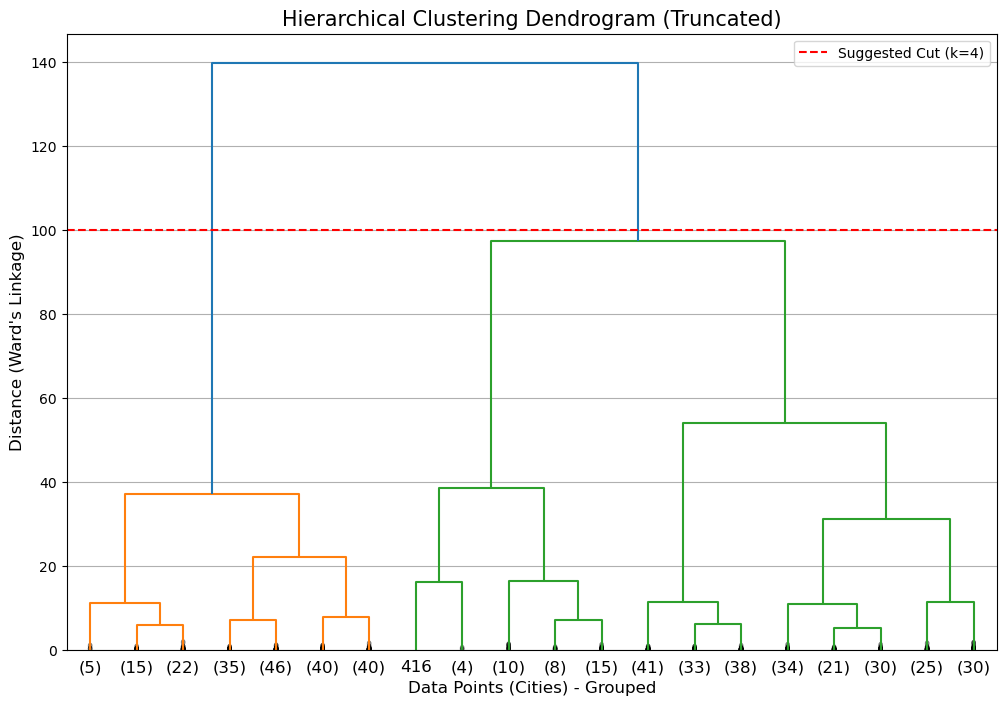

In [20]:
print("Plotting dendrogram...")

plt.figure(figsize=(12, 8))
plt.title("Hierarchical Clustering Dendrogram (Truncated)", fontsize=15)
plt.xlabel("Data Points (Cities) - Grouped", fontsize=12)
plt.ylabel("Distance (Ward's Linkage)", fontsize=12)

# Plot the dendrogram
# truncate_mode='lastp' shows only the last 'p' merged clusters
dend = shc.dendrogram(
    Z,
    truncate_mode='lastp',  # Show only the last p merged clusters
    p=20,                   # We'll show the last 20 merges
    show_contracted=True    # This shows the count of points in each leaf
)

# Add a horizontal line to suggest a cut
# We'll cut at a distance of 100 to get 4 clusters
plt.axhline(y=100, color='r', linestyle='--', label='Suggested Cut (k=4)')
plt.legend()
plt.grid(axis='y')

plt.savefig('hierarchical_dendrogram.png')
print("Dendrogram plot saved to 'hierarchical_dendrogram.png'")

In [21]:
#Another way to determine optimal_k
u_color = set(dend['color_list'])
print(len(u_color)-1)

2


In [22]:
optimal_k = 3
df['Clusters'] = fcluster(linked,optimal_k,criterion='maxclust')

In [23]:
print(df['Clusters'].value_counts().sort_index())

Clusters
1    203
2     38
3    252
Name: count, dtype: int64


In [27]:
import seaborn as sns

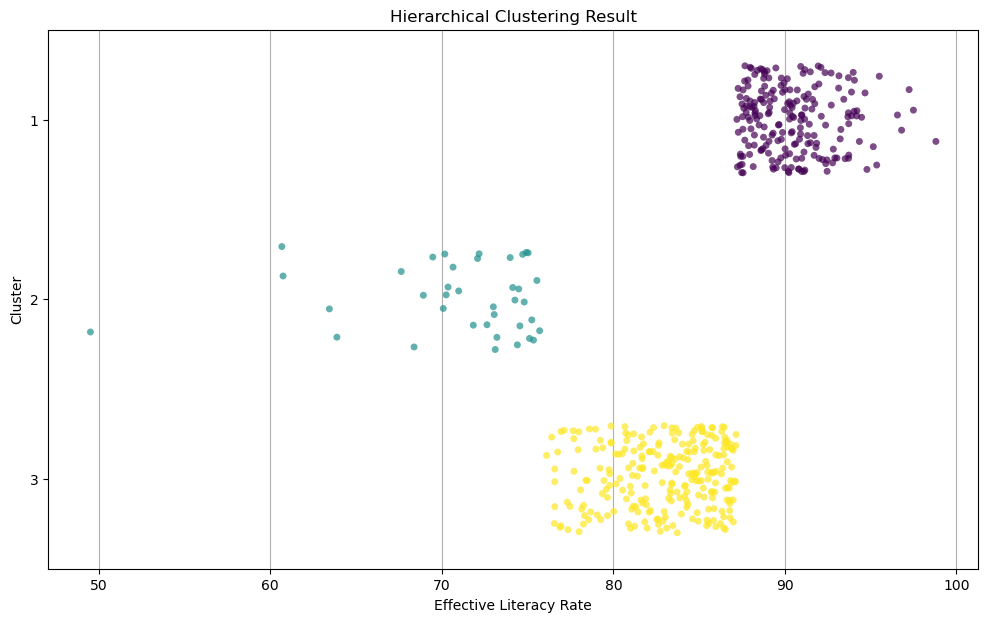

In [28]:
plt.figure(figsize=(12,7))
sns.stripplot(x='effective_literacy_rate_total',y='Clusters',data=df,palette='viridis',hue='Clusters',jitter=0.3,alpha=0.7,orient='h')
plt.title('Hierarchical Clustering Result')
plt.xlabel('Effective Literacy Rate')
plt.ylabel('Cluster')
plt.yticks(ticks=range(optimal_k), labels=range(1,optimal_k+1))
plt.legend().remove()
plt.grid(axis='x')
plt.savefig('hierarchichal_cluster_1.png')